# Lab 2

## The main question

The datasets chosen for this laboratory project concern activated and terminated employment contracts in Lombardy. 
The goal is to get a prevision on the number of activated and terminated contracts based on parameters such date, educational qualification and geographical area. In this way it is possible to get an overwiew about the labour market based on the input data.

## Imports

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from datetime import datetime

## Datasets preprocessing

The considered datasets are available on the Lombardy Region website at the following links:

[__Activated contracts__](https://www.dati.lombardia.it/Attivit-Produttive/Rapporti-di-lavoro-attivati/qbau-cyuc)

[__Terminated contracts__](https://www.dati.lombardia.it/Attivit-Produttive/Rapporti-di-lavoro-cessati/nwz3-p6vm)

### Datasets overview

In [2]:
start = datetime.timestamp(datetime.now())
# Loading and showing the first dataset
activated_work = pd.read_csv("Rapporti_di_lavoro_attivati.csv")
# Loading and showing the second dataset
terminated_work = pd.read_csv("Rapporti_di_lavoro_cessati.csv")
stop = datetime.timestamp(datetime.now())
activated_work.rename(columns={'ITALIANO':'NAZIONALITA'}, inplace=True)
terminated_work.rename(columns={'ITALIANO':'NAZIONALITA'}, inplace=True)

In [3]:
print('Time required : '+str((stop - start)/1000))

Time required : 0.022028260946273803


In [4]:
activated_work['TIPOLOGIA'] = 'ATTIVATO'
terminated_work['TIPOLOGIA'] = 'TERMINATO'

In [5]:
total = [activated_work, terminated_work]

result = pd.concat(total)

result_df = pd.DataFrame(result) #check if redundant

In [6]:
result_df.head()

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,NAZIONALITA,TIPOLOGIA
0,09/05/2020,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA,ATTIVATO
1,12/07/2019,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,ATTIVATO
2,05/06/2013,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA,ATTIVATO
3,12/03/2010,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA,ATTIVATO
4,06/04/2021,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA,ATTIVATO


## Feature selection

In [7]:
newDF = result_df[['DATA', 'TITOLOSTUDIO', 'PROVINCIAIMPRESA', 'TIPOLOGIA']]

newDF.head()

,DATA,TITOLOSTUDIO,PROVINCIAIMPRESA,TIPOLOGIA
0,09/05/2020,NESSUN TITOLO DI STUDIO,BERGAMO,ATTIVATO
1,12/07/2019,LICENZA MEDIA,BERGAMO,ATTIVATO
2,05/06/2013,LICENZA MEDIA,BERGAMO,ATTIVATO
3,12/03/2010,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,BERGAMO,ATTIVATO
4,06/04/2021,LICENZA MEDIA,BERGAMO,ATTIVATO


## Feature splitting (YEAR)

In [8]:
tempDF = newDF.copy()
tempDF['DATA'] = pd.to_datetime(tempDF['DATA'], errors = 'coerce', format='%d/%m/%Y')
tempDF['YEAR']= tempDF['DATA'].dt.year
tempDF['MONTH']= tempDF['DATA'].dt.month
#2600 entry is ignored in the following plots, workaround because it exceeds representation limit
#insert it manually, 12/11/2600 OR specify that it was removed beacuse of this

In [9]:
newDF = tempDF[['YEAR', 'MONTH', 'TITOLOSTUDIO', 'PROVINCIAIMPRESA', 'TIPOLOGIA']].copy()

In [10]:
newDF.head()

,YEAR,MONTH,TITOLOSTUDIO,PROVINCIAIMPRESA,TIPOLOGIA
0,2020.0,5.0,NESSUN TITOLO DI STUDIO,BERGAMO,ATTIVATO
1,2019.0,7.0,LICENZA MEDIA,BERGAMO,ATTIVATO
2,2013.0,6.0,LICENZA MEDIA,BERGAMO,ATTIVATO
3,2010.0,3.0,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,BERGAMO,ATTIVATO
4,2021.0,4.0,LICENZA MEDIA,BERGAMO,ATTIVATO


## NaN detection and management

In [11]:
print('Null Values Count for each feature in Activated')
print(newDF.isnull().sum())

Null Values Count for each feature in Activated
YEAR                   1
MONTH                  1
TITOLOSTUDIO        1020
PROVINCIAIMPRESA       0
TIPOLOGIA              0
dtype: int64


In [12]:
print(newDF.count())

YEAR                13321187
MONTH               13321187
TITOLOSTUDIO        13320168
PROVINCIAIMPRESA    13321188
TIPOLOGIA           13321188
dtype: int64


In [13]:
newDF = newDF.dropna()
print(newDF.isnull().sum())

YEAR                0
MONTH               0
TITOLOSTUDIO        0
PROVINCIAIMPRESA    0
TIPOLOGIA           0
dtype: int64


## Outlier detection and management

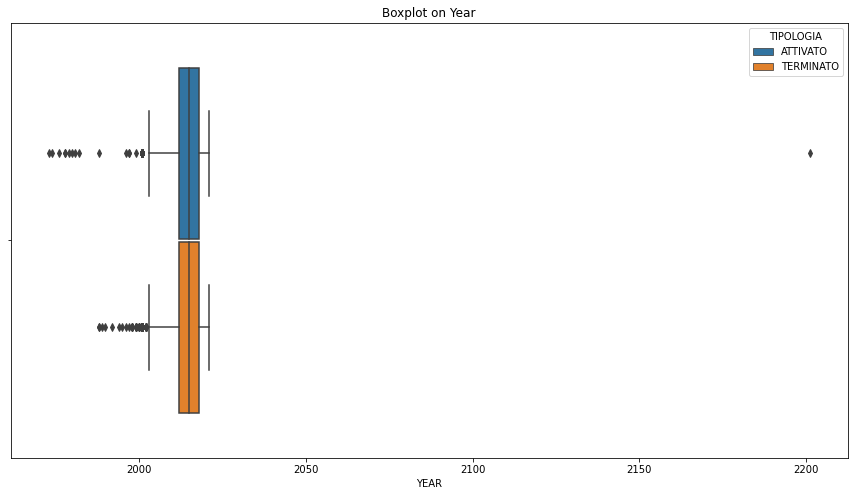

In [14]:
## Check outliers
ax = sb.boxplot(x=newDF['YEAR'], y=[""]*len(newDF), hue=newDF['TIPOLOGIA'])
# Workaround cause bug, y needs to be filled with dummy data
ax.set_title("Boxplot on Year")
plt.gcf().set_size_inches(15, 8)
plt.show()
# TODO: add description of bloxplot (outliers because of impossible year value)

In [17]:
#calculating Q1 and Q3 and boxplot
cols = ['YEAR'] # one or more

Q1 = newDF[cols].quantile(0.25)
Q3 = newDF[cols].quantile(0.75)
IQR = Q3 - Q1

In [18]:
print(len(newDF[newDF['YEAR'] < int(Q1 - 1.5 * IQR)]))
print(len(newDF[newDF['YEAR'] > int(Q3 + 1.5 * IQR)]))

1588
1


In [19]:
newDF = newDF[~((newDF[cols] < (Q1 - 1.5 * IQR)) |(newDF[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

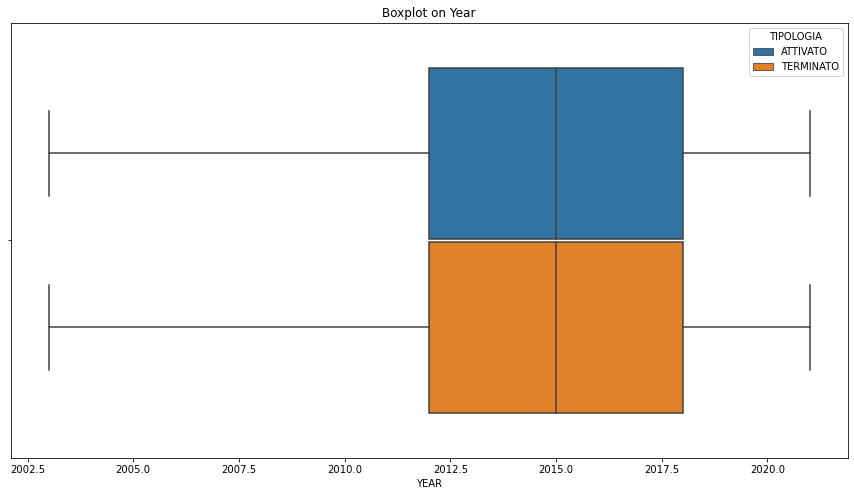

In [20]:
## Check outliers
ax = sb.boxplot(x=newDF['YEAR'], y=[""]*len(newDF), hue=newDF['TIPOLOGIA'])
# Workaround cause bug, y needs to be filled with dummy data
ax.set_title("Boxplot on Year")
plt.gcf().set_size_inches(15, 8)
plt.show()
# TODO: add description of bloxplot (outliers because of impossible year value)

## Feature encoding

In [21]:
enc = preprocessing.OrdinalEncoder()
enc.fit(newDF[['TITOLOSTUDIO','PROVINCIAIMPRESA', 'TIPOLOGIA']])
newDF[['TITOLOSTUDIO','PROVINCIAIMPRESA', 'TIPOLOGIA']] = enc.transform(newDF[['TITOLOSTUDIO','PROVINCIAIMPRESA', 'TIPOLOGIA']])

In [22]:
newDF.describe()

,YEAR,MONTH,TITOLOSTUDIO,PROVINCIAIMPRESA,TIPOLOGIA
count,1.331858e+07,1.331858e+07,1.331858e+07,1.331858e+07,1.331858e+07
mean,2.015102e+03,6.392226e+00,5.192938e+00,5.624495e+00,2.807670e-01
std,3.588222e+00,3.458480e+00,3.324619e+00,3.133814e+00,4.493739e-01
min,2.003000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.012000e+03,3.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00
50%,2.015000e+03,6.000000e+00,6.000000e+00,7.000000e+00,0.000000e+00
75%,2.018000e+03,9.000000e+00,8.000000e+00,7.000000e+00,1.000000e+00
max,2.021000e+03,1.200000e+01,1.100000e+01,1.100000e+01,1.000000e+00


In [23]:
newDF.head()

,YEAR,MONTH,TITOLOSTUDIO,PROVINCIAIMPRESA,TIPOLOGIA
0,2020.0,5.0,8.0,0.0,0.0
1,2019.0,7.0,6.0,0.0,0.0
2,2013.0,6.0,6.0,0.0,0.0
3,2010.0,3.0,0.0,0.0,0.0
4,2021.0,4.0,6.0,0.0,0.0


In [24]:
newDF.describe()

,YEAR,MONTH,TITOLOSTUDIO,PROVINCIAIMPRESA,TIPOLOGIA
count,1.331858e+07,1.331858e+07,1.331858e+07,1.331858e+07,1.331858e+07
mean,2.015102e+03,6.392226e+00,5.192938e+00,5.624495e+00,2.807670e-01
std,3.588222e+00,3.458480e+00,3.324619e+00,3.133814e+00,4.493739e-01
min,2.003000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.012000e+03,3.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00
50%,2.015000e+03,6.000000e+00,6.000000e+00,7.000000e+00,0.000000e+00
75%,2.018000e+03,9.000000e+00,8.000000e+00,7.000000e+00,1.000000e+00
max,2.021000e+03,1.200000e+01,1.100000e+01,1.100000e+01,1.000000e+00
